In [70]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal.windows import hamming

In [71]:
meta = pd.read_csv('../data/ff1010bird/ff1010bird_metadata.csv')
meta.head()

,itemid,hasbird
0,64486,0
1,2525,0
2,44981,0
3,101323,0
4,165746,0


In [72]:
first_bird = meta[meta['hasbird'] == 1].sort_values('itemid')['itemid'].values[0]

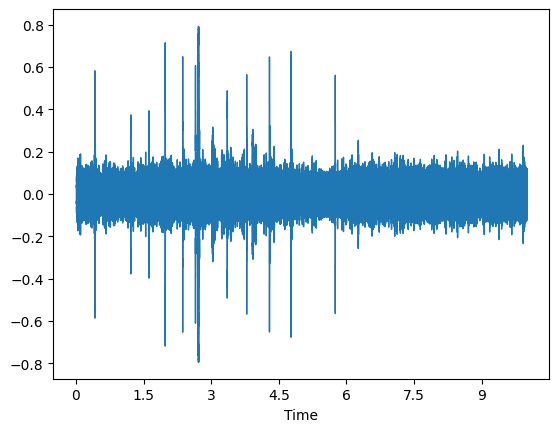

In [73]:
file_path = f'../data/ff1010bird/wav/{first_bird}.wav'
y, sr = librosa.load(file_path)

song, _ = librosa.effects.trim(y)
librosa.display.waveshow(song, sr=sr)

In [74]:
song_length = song.shape[0] / sr # seconds
frame_length = 40 * 10 ** -3 # seconds
samples_per_frame = frame_length * sr
overlap = 0.5

n_fft = int(samples_per_frame)
hop_length = int(overlap * samples_per_frame)
window = hamming
n_mels = 40


In [77]:
S = librosa.feature.melspectrogram(
    y=song, sr=sr, n_fft=n_fft, hop_length=hop_length, window=window, n_mels=40, power=1,
    center=True
)
S_DB = librosa.amplitude_to_db(S, ref=np.max)[:,0:-1]
print(S_DB.shape)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');